In [4]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [16]:
for i in range(20): 
    some_digit = X[69000+i]
    print(some_digit.shape)
    some_digit_image = some_digit.reshape(28,28)
    print(some_digit_image.shape)

(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)


In [5]:
X, y=mnist["data"],mnist["target"]

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [8]:
shuffle_index = np.random.permutation(60000)

In [26]:
print(y_train[:30])
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)  
print(y_train_7[:30])


[[  6.46675933]
 [ 22.40060338]
 [252.55551655]
 [114.51848069]
 [ 31.1515984 ]
 [  8.54187607]
 [ 67.68189822]
 [ 18.75451573]
 [313.63003423]
 [  6.89660974]
 [ 22.68256936]
 [ 27.60199727]
 [113.46775206]
 [ 98.8848527 ]
 [124.3759516 ]]
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=50)
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [29]:
sgd.fit(X_train, y_train_7)
sgd.predict(X_test[:30])

some_digit_image = some_digit.reshape(28,28)


C:\Users\RajKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [60000, 15]

In [ ]:
sgd.predict(X_test[5500:5525])

In [ ]:
some_digit = X_test[5500]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd, X_train, y_train_7, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_7_pred = cross_val_predict(sgd, X_train, y_train_7, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_7_pred)

In [ ]:
y_train_5_pred_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method = "decision_function")

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_7, y_train_7_pred_scores)

In [ ]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [ ]:
sgd_clf_8 = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_8.fit(x_train, y_train_8)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_8, cv=3, scoring="accuracy")

In [18]:
import numpy as np
x = 4 * np.random.rand(60,1)
y = 5 + 4*(x**3) + 3*(x**2) + 2*x + np.random.randn(60,1)

In [19]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)

<class 'numpy.ndarray'> 2 (60, 1) <class 'numpy.ndarray'> 2 (60, 1)


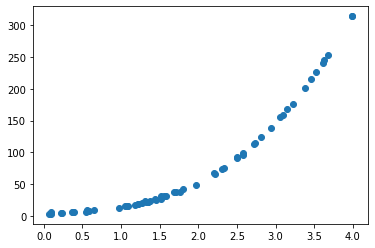

In [21]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
num_degrees = 3 #polynomial function of degree 3
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])# here we get the x-coefficent and x*2 coefficient in x_poly[0]
print(x.shape, x_poly.shape)

[1.45116253] [1.45116253 2.10587268 3.05596351]
(60, 1) (60, 3)


[6.2482555] [[0.47719579 3.8562095  3.85864662]]
Mean Squared Error on Test:  1.499438367890987


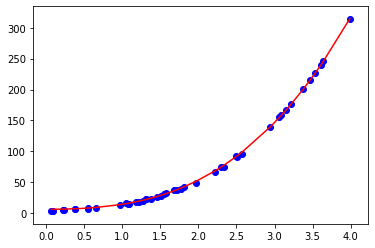

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.75)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()
